Carbon Flux to the Atmosphere from Land-Use Changes 1850-2005

1) First upload the data set from the following source: https://cdiac.ess-dive.lbl.gov/trends/landuse/houghton/houghton.html. This can be done by downloading the excel file. Store this data as a dataframe. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving Global_land-use_flux-1850_2005.xls to Global_land-use_flux-1850_2005.xls


In [21]:
df = pd.read_excel('Global_land-use_flux-1850_2005.xls')
landdata = pd.DataFrame(data=df)
landdata

,Year,Global,USA,Canada,S+C America,Europe,Nafrica/Meast,Trop.Africa,Frmr USSR,China,S+SE Asia,Pac.Dev.Reg
0,1850,500.6,164.0922,5.5476,23.4757,55.0441,3.9840,-1.3484,58.5571,101.8392,87.3469,2.0458
1,1851,492.7,165.7256,5.3626,23.1520,55.0156,3.9839,-1.1192,58.5525,93.0766,86.9100,2.0419
2,1852,548.5,230.6725,5.3380,22.8618,54.9874,3.9837,-1.0033,58.8781,83.8307,86.9385,2.0379
3,1853,546.8,238.5149,5.3138,22.6017,54.9590,3.9835,-1.0513,59.2207,74.2140,86.9935,2.0338
4,1854,544.8,246.1846,5.2899,22.3687,54.9304,3.9833,-0.9855,59.5802,64.3129,87.0630,2.0297
...,...,...,...,...,...,...,...,...,...,...,...,...
151,2001,1385.4,-31.9488,17.6121,643.1904,-18.0804,23.2448,261.6969,20.1075,-12.9153,478.5329,3.9161
152,2002,1517.7,-31.9488,17.6121,625.5099,-18.0804,23.2448,258.5236,20.1075,-12.9153,631.6960,3.9161
153,2003,1513.2,-31.9488,17.6121,616.4536,-18.0804,23.2448,225.5212,20.1075,-12.9153,669.2975,3.9161
154,2004,1534.9,-31.9488,17.6121,609.3525,-18.0804,23.2448,225.7864,20.1075,-12.9153,697.8432,3.9161


 - Rename the column Europe as "EU" using .rename() 


In [22]:
landdata = landdata.rename(columns = {'Europe': 'EU'})

 - drop the Pac.Dev.Reg column, we will not be using it for this exercise

In [23]:
landdata = landdata.drop(columns=['Pac.Dev.Reg'])

 - construct a dataframe named "badFlux" with values from the columns USA, Europe, and China with a flux less than 0

In [11]:
badFluxUSA = [] 
for i in landdata["USA"]:
  if i<0: 
    badFluxUSA.append(i)

badFluxEU = [] 
for i in landdata["EU"]:
  if i<0: 
    badFluxEU.append(i)

badFluxChina = [] 
for i in landdata["China"]:
  if i<0: 
    badFluxChina.append(i)

badFlux = pd.DataFrame(list(zip(badFluxUSA,badFluxEU,badFluxChina)), columns=['USA', 'EU', "China"]) 
badFlux

,USA,EU,China
0,-4.8479,-2.6384,-12.9153
1,-5.2068,-5.6405,-12.9153
2,-10.5706,-8.7890,-12.9153
3,-11.3810,-12.0787,-12.9153
4,-42.0452,-14.0904,-12.9153
5,-66.2967,-15.3441,-12.9153


 - find the mean flux of all the regions represented and order the columns based on least mean carbon(largest number) flux to most impactful carbon flux( most negative number) 

In [15]:
landdata.describe()
landdataNew= landdata[["Nafrica/Meast","Canada", "Pac.Dev.Reg", "EU", "Frmr USSR", "Trop.Africa", "USA", "China", "S+SE Asia","S+C America"]]
landdataNew

,Nafrica/Meast,Canada,Pac.Dev.Reg,EU,Frmr USSR,Trop.Africa,USA,China,S+SE Asia,S+C America
0,3.9840,5.5476,2.0458,55.0441,58.5571,-1.3484,164.0922,101.8392,87.3469,23.4757
1,3.9839,5.3626,2.0419,55.0156,58.5525,-1.1192,165.7256,93.0766,86.9100,23.1520
2,3.9837,5.3380,2.0379,54.9874,58.8781,-1.0033,230.6725,83.8307,86.9385,22.8618
3,3.9835,5.3138,2.0338,54.9590,59.2207,-1.0513,238.5149,74.2140,86.9935,22.6017
4,3.9833,5.2899,2.0297,54.9304,59.5802,-0.9855,246.1846,64.3129,87.0630,22.3687
...,...,...,...,...,...,...,...,...,...,...
151,23.2448,17.6121,3.9161,-18.0804,20.1075,261.6969,-31.9488,-12.9153,478.5329,643.1904
152,23.2448,17.6121,3.9161,-18.0804,20.1075,258.5236,-31.9488,-12.9153,631.6960,625.5099
153,23.2448,17.6121,3.9161,-18.0804,20.1075,225.5212,-31.9488,-12.9153,669.2975,616.4536
154,23.2448,17.6121,3.9161,-18.0804,20.1075,225.7864,-31.9488,-12.9153,697.8432,609.3525


2)Understanding the data set. What is carbon flux? Take a look at the methods on the website of the data source. 

A carbon flux is the amount of carbon exchanged between Earth's carbon pools - the oceans, atmosphere, land, and living things. Negative fluxes (blue regions) indicate places where uptake of CO2 occurs. Positive fluxes (red colors) indicate places where emission of CO2 occurs. The pattern of exchange follows swings in temperature and sunlight and changes with season. Now, fossil fuel burning is the greatest factor in atmospheric carbon fluctuations. The bottom line of all this is that the amount of carbon in the atmosphere is increasing by about 6.1 gigatons per year, mostly due to fossil fuel burning and land use changes that destroy soil organic carbon.


3) Graphing: Plot a graph which compares CO2 emissions in the US to the Global emissions from 1850 to 2005. What can you infer from this graph and why might that be?

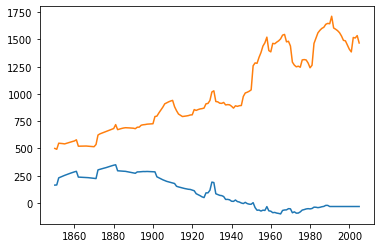

In [45]:
import matplotlib.pyplot as plt
plt.plot(landdata['Year'],landdata['USA'])
plt.plot(landdata['Year'],landdata['Global'])

As time goes on, the global carbon flux increases and the USA carbon flux decreases. 

4) Data manipulation: Create two new columns within the data frame named "P/N USA" and "P/N SCAmerica" 

In [32]:
landdata["P/N USA"] =  df.apply(lambda _: '', axis=1)
landdata["P/N SCAmerica"] =  df.apply(lambda _: '', axis=1)
landdata

,Year,Global,USA,Canada,S+C America,EU,Nafrica/Meast,Trop.Africa,Frmr USSR,China,S+SE Asia,P/N USA,P/N SCAmerica
0,1850,500.6,164.0922,5.5476,23.4757,55.0441,3.9840,-1.3484,58.5571,101.8392,87.3469,,
1,1851,492.7,165.7256,5.3626,23.1520,55.0156,3.9839,-1.1192,58.5525,93.0766,86.9100,,
2,1852,548.5,230.6725,5.3380,22.8618,54.9874,3.9837,-1.0033,58.8781,83.8307,86.9385,,
3,1853,546.8,238.5149,5.3138,22.6017,54.9590,3.9835,-1.0513,59.2207,74.2140,86.9935,,
4,1854,544.8,246.1846,5.2899,22.3687,54.9304,3.9833,-0.9855,59.5802,64.3129,87.0630,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2001,1385.4,-31.9488,17.6121,643.1904,-18.0804,23.2448,261.6969,20.1075,-12.9153,478.5329,,
152,2002,1517.7,-31.9488,17.6121,625.5099,-18.0804,23.2448,258.5236,20.1075,-12.9153,631.6960,,
153,2003,1513.2,-31.9488,17.6121,616.4536,-18.0804,23.2448,225.5212,20.1075,-12.9153,669.2975,,
154,2004,1534.9,-31.9488,17.6121,609.3525,-18.0804,23.2448,225.7864,20.1075,-12.9153,697.8432,,


- Once these new columns have been created, give the row a "P" if the is a positive carbon flux and a "N" if there is a negative carbon flux in the USA for "P/N USA" and the same for "PN SC America" for the S and Central America region.

In [37]:
PNUSA = []
for i in landdata["USA"]:
  if i >0:
    PNUSA.append('P')
  if i<= 0: 
    PNUSA.append('N')
landdata["P/N USA"] = PNUSA

PNSCA = []
for i in landdata["S+C America"]:
  if i >0:
    PNSCA.append('P')
  if i<= 0: 
    PNSCA.append('N')
landdata["P/N SCAmerica"] = PNSCA

landdata

,Year,Global,USA,Canada,S+C America,EU,Nafrica/Meast,Trop.Africa,Frmr USSR,China,S+SE Asia,P/N USA,P/N SCAmerica
0,1850,500.6,164.0922,5.5476,23.4757,55.0441,3.9840,-1.3484,58.5571,101.8392,87.3469,P,P
1,1851,492.7,165.7256,5.3626,23.1520,55.0156,3.9839,-1.1192,58.5525,93.0766,86.9100,P,P
2,1852,548.5,230.6725,5.3380,22.8618,54.9874,3.9837,-1.0033,58.8781,83.8307,86.9385,P,P
3,1853,546.8,238.5149,5.3138,22.6017,54.9590,3.9835,-1.0513,59.2207,74.2140,86.9935,P,P
4,1854,544.8,246.1846,5.2899,22.3687,54.9304,3.9833,-0.9855,59.5802,64.3129,87.0630,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2001,1385.4,-31.9488,17.6121,643.1904,-18.0804,23.2448,261.6969,20.1075,-12.9153,478.5329,N,P
152,2002,1517.7,-31.9488,17.6121,625.5099,-18.0804,23.2448,258.5236,20.1075,-12.9153,631.6960,N,P
153,2003,1513.2,-31.9488,17.6121,616.4536,-18.0804,23.2448,225.5212,20.1075,-12.9153,669.2975,N,P
154,2004,1534.9,-31.9488,17.6121,609.3525,-18.0804,23.2448,225.7864,20.1075,-12.9153,697.8432,N,P


 - what does a positive carbon flux mean and what does a negative carbon flux mean?


Negative fluxes (blue regions) indicate places where uptake of CO2 occurs. Positive fluxes (red colors) indicate places where emission of CO2 occurs. Negative flux is bad for the environment.

 - Plot the flux of the US and S and Central America over time. What can you infer from this? 

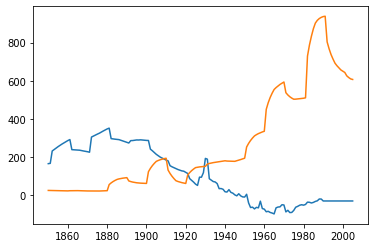

In [43]:
plt.plot(landdata['Year'],landdata['USA'])
plt.plot(landdata['Year'],landdata['S+C America'])

As time goes on, the South and Central America carbon flux increases and the USA carbon flux decreases. 

What duty do we have as data scientists to make sense of this data? Is this dataset concerning?

It is our duty as data scientists to make data like this available because it brings to light the carbon flux emissions changes across the world. If data like this is analyzed, environmental restrictions could be put in place to avoid detrimental change to the environment. 

Congrats you finished the assignment!